In [1]:
!gdown --id 1hkwS5IAhzS1B3dHU8sy1s7KbPcQN8RN5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hkwS5IAhzS1B3dHU8sy1s7KbPcQN8RN5
To: /content/synthetic_financial_data.csv
100% 39.5k/39.5k [00:00<00:00, 52.6MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
synthetic_financial_data = pd.read_csv("/content/synthetic_financial_data.csv")

synthetic_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       500 non-null    int64  
 1   Annual_Income    500 non-null    float64
 2   Credit_Score     500 non-null    float64
 3   Loan_Amount      500 non-null    float64
 4   Monthly_Expense  500 non-null    float64
 5   Default          500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [5]:
synthetic_financial_data = synthetic_financial_data.drop(['Unnamed: 0'], axis = 1)

In [6]:
synthetic_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual_Income    500 non-null    float64
 1   Credit_Score     500 non-null    float64
 2   Loan_Amount      500 non-null    float64
 3   Monthly_Expense  500 non-null    float64
 4   Default          500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


<Axes: >

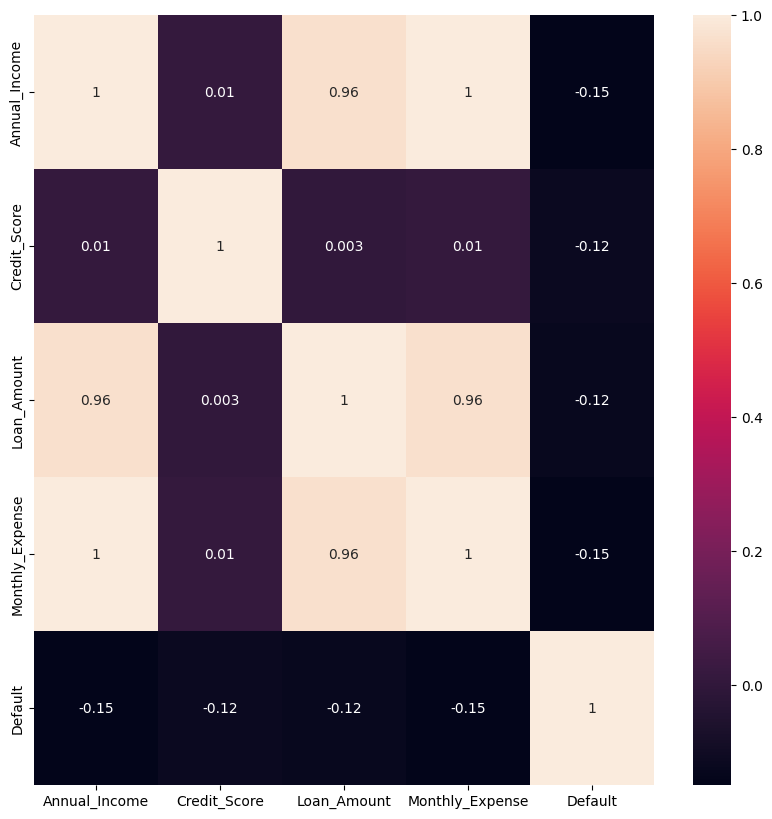

In [8]:
correlaion_matrix = synthetic_financial_data.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(correlaion_matrix, annot = True)


In [10]:
X = synthetic_financial_data["Annual_Income"]
y = synthetic_financial_data["Loan_Amount"]

X_constants = sm.add_constant(X)


In [11]:
X_constants

,const,Annual_Income
0,1.0,63708.610696
1,1.0,115564.287577
2,1.0,95879.454763
3,1.0,83879.263578
4,1.0,44041.677640
...,...,...
495,1.0,61801.700522
496,1.0,82529.050067
497,1.0,36996.117327
498,1.0,117695.532690


In [12]:
model_sm = sm.OLS(y, X_constants).fit()

model_summary = model_sm.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     6735.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):          1.63e-291
Time:                        09:32:56   Log-Likelihood:                -4706.7
No. Observations:                 500   AIC:                             9417.
Df Residuals:                     498   BIC:                             9426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9728.8917    393.479     24.725

Text(0.5, 1.0, 'Annual_Income vs Loan_Amount')

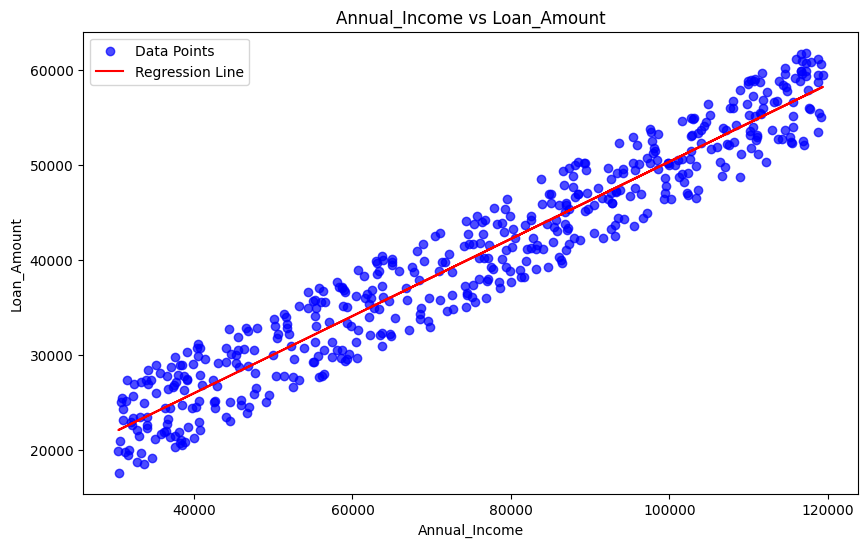

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X, y,color = 'blue', alpha=0.7,label = "Data Points")
plt.plot(X, model_sm.predict(), color = 'red', label = 'Regression Line')
plt.legend()
plt.xlabel("Annual_Income")
plt.ylabel("Loan_Amount")
plt.title("Annual_Income vs Loan_Amount")


# Hypothesis testing



*   **Null Hypothesis $H_0$**: Annual Income has no effect on Loan Amount
*   **Alternative Hypothesis $H_a$**: Annual Income affects Loan Amount



In [14]:
p_value = model_sm.pvalues["Annual_Income"]

print(p_value)

1.6305019339246056e-291


In [15]:
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [16]:
# Credit Score and Annual Income
X = synthetic_financial_data["Annual_Income"]
y = synthetic_financial_data["Credit_Score"]

X_constants = sm.add_constant(X)

model_sm = sm.OLS(y, X_constants).fit()

model_summary = model_sm.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05340
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.817
Time:                        09:50:52   Log-Likelihood:                -3237.1
No. Observations:                 500   AIC:                             6478.
Df Residuals:                     498   BIC:                             6487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           560.5451     20.819     26.925

In [17]:
p_value = model_sm.pvalues["Annual_Income"]

print(p_value)

0.8173507349118576


In [18]:
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis
